In [570]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [586]:
df = pd.DataFrame({
    "firm_id": np.random.randint(1, 10, 500),
    "month": np.random.randint(1, 24, 500),
    "performance": np.random.uniform(10, -40, 500)
})

In [587]:
df["q_performance"] = np.nan
for month in df["month"].unique():
    
    mask = df[df["month"] == month].groupby(["firm_id"])["performance"].mean()
    mask = pd.qcut(mask, 5, labels=["Q" + str(i) for i in reversed(range(1, 6))]).to_dict()
    
    df.loc[df["month"] == month, "q_performance"] = df.loc[df["month"] == month, "firm_id"].map(mask)

In [588]:
time_series_performance = pd.DataFrame(columns=["Q" + str(i) for i in reversed(range(1, 6))])
for month in df["month"].unique():
    
    y = df[df["month"] == month].groupby(["q_performance"])["performance"].mean()
    
    time_series_performance.loc[month] = y

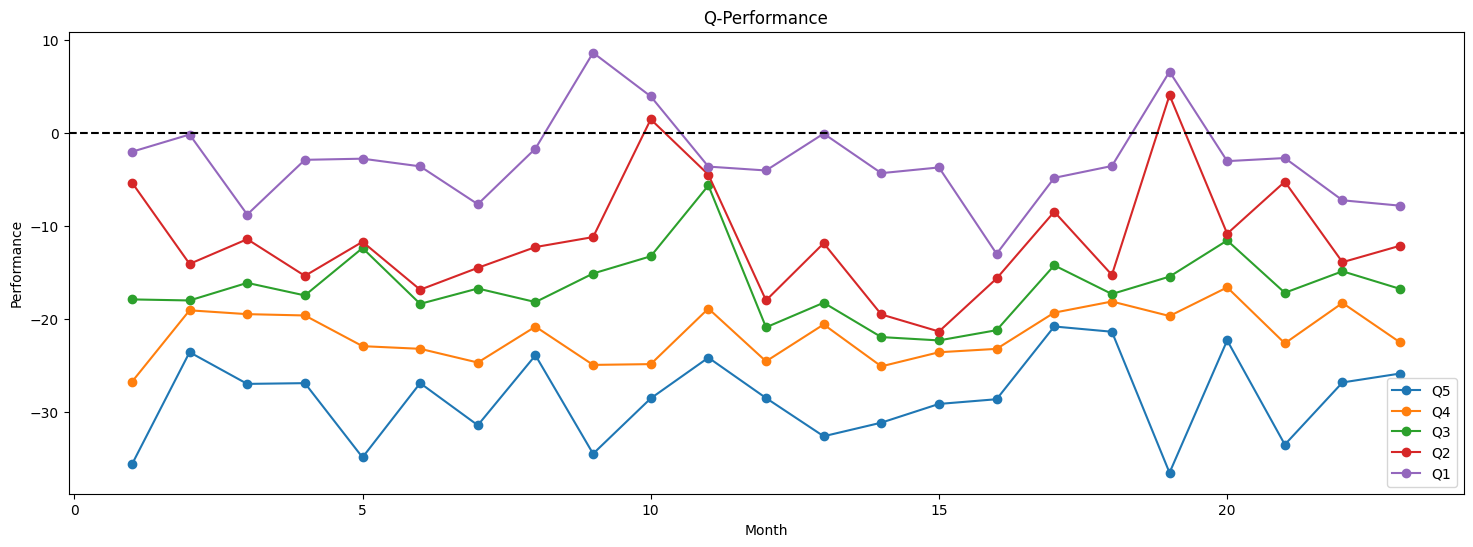

In [589]:
time_series_performance.sort_index().plot(marker="o", title="Q-Performance", xlabel="Month", ylabel="Performance", figsize=(18, 6))
plt.axhline(0, color="black", linestyle="--")